# Gilbert Barr
I've decided to try soving the MNIST dataset with pytorch
curently having trouble with tensor data types though

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)

In [3]:

device = torch.device("cuda") 
net = Net().to(device)
summary(net, input_size = (1,28*28))
#print(net)

#loss_function = nn.MSELoss()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
            Linear-2                [-1, 1, 64]           4,160
            Linear-3                [-1, 1, 64]           4,160
            Linear-4                [-1, 1, 64]           4,160
            Linear-5                [-1, 1, 10]             650
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.24
Estimated Total Size (MB): 0.25
----------------------------------------------------------------


In [4]:
#helper function for converting to onehot
def oneHot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

# create a custom MNST data class for easy training
class MNIST_Dataset(Dataset):
    def __init__(self, datapath):
        #load data
        data = np.loadtxt(datapath ,delimiter=',', dtype=np.float32, skiprows=1)
        #print(data[0])
        #feature, data_label = data
        self.feature = torch.from_numpy(data[:,1:]).to(device)
        one_hot = oneHot(data[:,0:1].astype(int),10)
        #self.data_label = torch.from_numpy(one_hot.astype(np.int32)).to(device)
        self.data_label = torch.from_numpy(data[:,0:1]).type(torch.LongTensor).to(device)
        self.num_samples = data.shape[0]

    def __getitem__(self,index):
        #get data
        #print("index: ",index)
        return self.feature[index],self.data_label[index]


    def __len__(self):
        #len(data)
        return self.num_samples

dataset = MNIST_Dataset('./train.csv')
feature, label = dataset[0]
#print(feature, label)
trainset = DataLoader(dataset=dataset, batch_size=30, shuffle=True)

tensor([1], device='cuda:0')


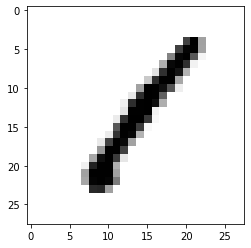

In [5]:
print(label)
#print(feature)
fig = plt.figure
plt.imshow(feature.cpu().detach().numpy().reshape(28,28), cmap='gray_r')
plt.show()

In [10]:
train = True
#train =False
epochs = 5
if (train):
    net.train()
    for epoch in range(epochs):
        for data in trainset:  
            feature, data_label = data #
            #print(data)
            #print(feature)
            #print(data_label)
            net.zero_grad()  
            output = net(feature)
            loss = loss_function(output, data_label[:,0]) 
            loss.backward() 
            optimizer.step() 
        print(epoch,loss)

0 tensor(0.0693, device='cuda:0', grad_fn=<NllLossBackward>)
1 tensor(0.2421, device='cuda:0', grad_fn=<NllLossBackward>)
2 tensor(0.0795, device='cuda:0', grad_fn=<NllLossBackward>)
3 tensor(0.1523, device='cuda:0', grad_fn=<NllLossBackward>)
4 tensor(0.1801, device='cuda:0', grad_fn=<NllLossBackward>)
5 tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward>)
6 tensor(0.2258, device='cuda:0', grad_fn=<NllLossBackward>)
7 tensor(0.0625, device='cuda:0', grad_fn=<NllLossBackward>)
8 tensor(0.0874, device='cuda:0', grad_fn=<NllLossBackward>)
9 tensor(0.0317, device='cuda:0', grad_fn=<NllLossBackward>)
10 tensor(0.1510, device='cuda:0', grad_fn=<NllLossBackward>)
11 tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward>)
12 tensor(0.0368, device='cuda:0', grad_fn=<NllLossBackward>)
13 tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward>)
14 tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward>)
15 tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward>)


KeyboardInterrupt: 

In [13]:
testset = MNIST_Dataset('./test.csv')
correct = 0
total = 0

In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        feature, data_label = data
        output = net(feature)
        print(output)
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == data_label[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)